![](/pictures/mathematics-formulas-on-a-blackboard.png)

# Les 10 formules les plus utilisées en finance de marché

La finance de marché est un domaine complexe qui repose sur de nombreuses formules pour analyser et évaluer les actifs financiers. Dans cet article, nous présentons les 10 formules les plus utilisées en finance de marché. Chaque formule est décrite par son usage, son contexte, une formule en LaTeX, un code source en Python utilisant la bibliothèque yfinance pour récupérer les données de marché, et un graphique généré avec matplotlib.

## 1. Rendement moyen

### Usage
Le rendement moyen est utilisé pour estimer le rendement d'un actif financier sur une période donnée.

### Contexte
Le rendement moyen est souvent utilisé pour comparer les performances de différents actifs financiers ou pour évaluer l'efficacité d'un portefeuille d'investissement.

### Formule
$\mu = \frac{1}{n}\sum_{i=1}^{n}(R_i)$


[*********************100%%**********************]  1 of 1 completed

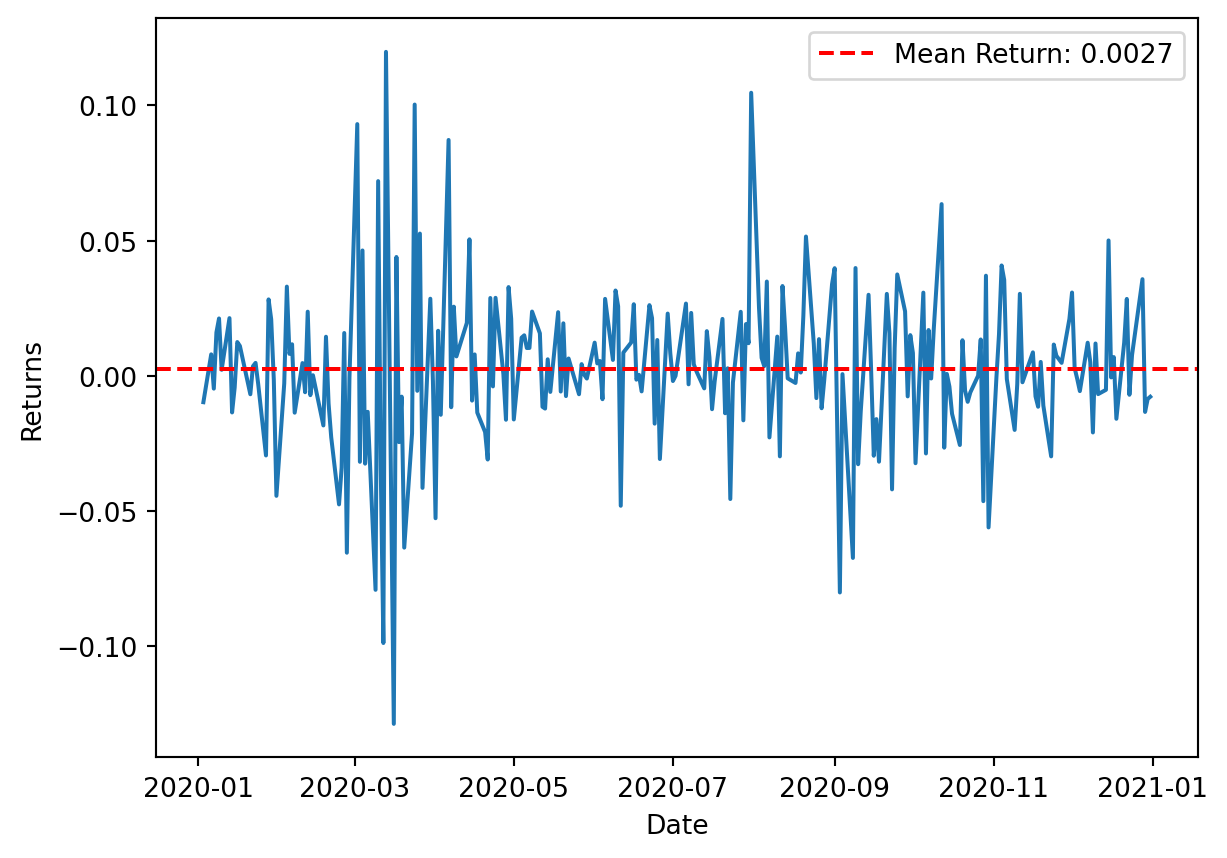

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2021-01-01')['Adj Close']
returns = data.pct_change().dropna()
mean_return = np.mean(returns)

plt.plot(returns)
plt.axhline(y=mean_return, color='r', linestyle='--', label=f'Mean Return: {mean_return:.4f}')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

## 2. Volatilité

### Usage
La volatilité est utilisée pour mesurer le risque associé à un actif financier en estimant l'écart-type de ses rendements.

### Contexte
Une volatilité élevée indique un actif plus risqué, tandis qu'une volatilité faible indique un actif moins risqué. La volatilité est souvent utilisée pour évaluer les fluctuations de prix et le risque de marché.

### Formule
$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(R_i - \mu)^2}$

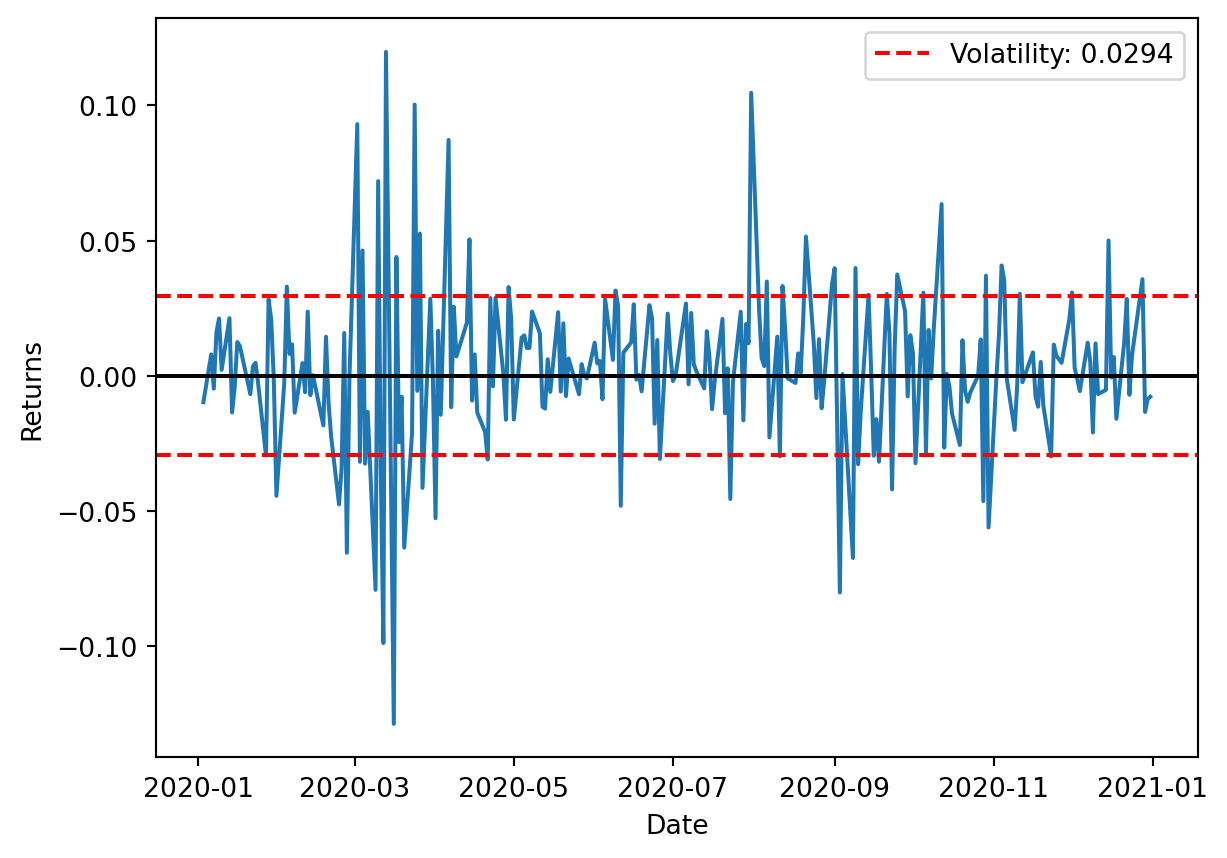

In [2]:
volatility = np.std(returns, ddof=1)

plt.plot(returns)
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=volatility, color='r', linestyle='--', label=f'Volatility: {volatility:.4f}')
plt.axhline(y=-volatility, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

## 3. Ratio de Sharpe

### Usage
Le ratio de Sharpe est utilisé pour évaluer la performance ajustée au risque d'un actif financier ou d'un portefeuille d'investissement.

### Contexte
Un ratio de Sharpe élevé indique une meilleure performance ajustée au risque, tandis qu'un ratio de Sharpe faible indique une moins bonne performance. Le ratio de Sharpe est souvent utilisé pour comparer les performances de différents actifs ou portefeuilles.

### Formule
$S = \frac{\mu - r_f}{\sigma}$

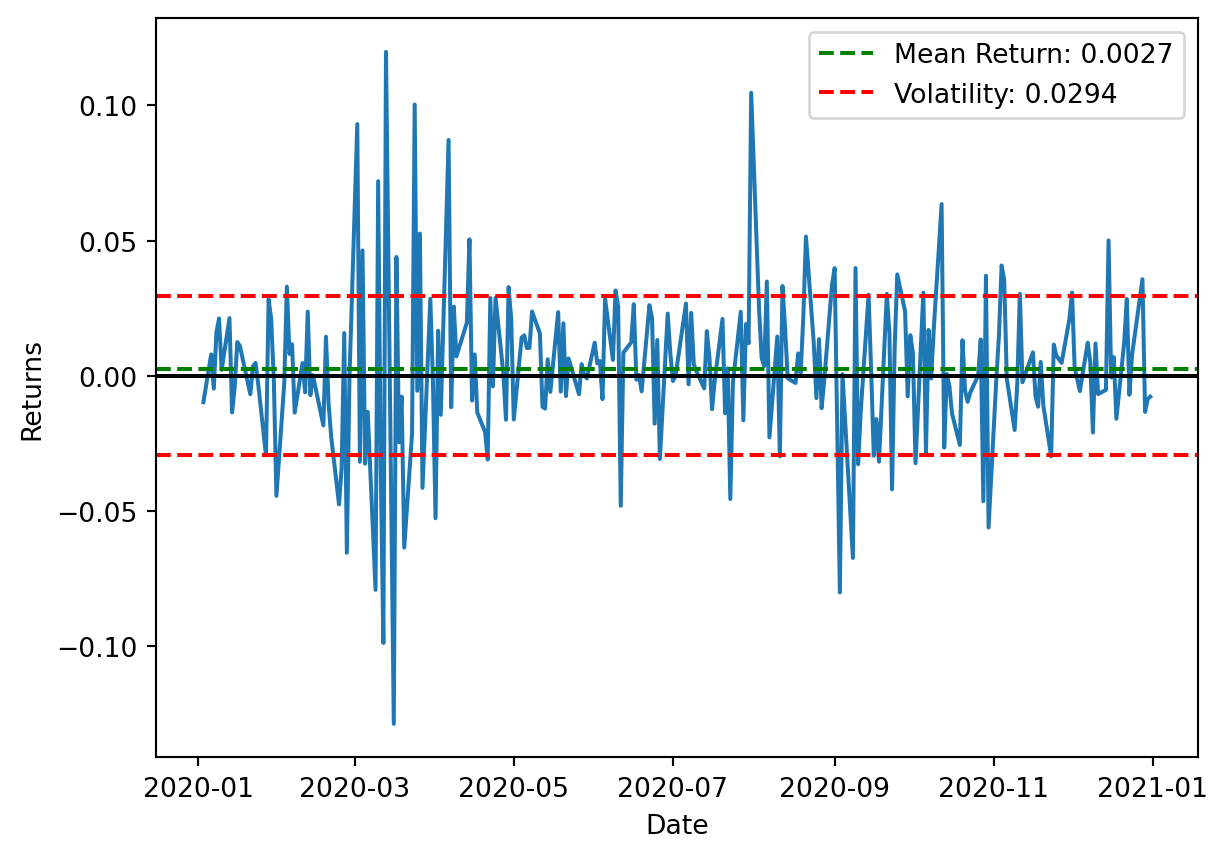

Sharpe Ratio: -0.5871


In [3]:
risk_free_rate = 0.02  # Assuming a 2% annual risk-free rate
sharpe_ratio = (mean_return - risk_free_rate) /volatility

plt.plot(returns)
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=mean_return, color='g', linestyle='--', label=f'Mean Return: {mean_return:.4f}')
plt.axhline(y=volatility, color='r', linestyle='--', label=f'Volatility: {volatility:.4f}')
plt.axhline(y=-volatility, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


## 4. Bêta

### Usage
La bêta est utilisée pour mesurer la sensibilité d'un actif financier par rapport aux mouvements du marché.

### Contexte
Un bêta supérieur à 1 indique un actif plus sensible aux mouvements du marché, tandis qu'un bêta inférieur à 1 indique un actif moins sensible. La bêta est souvent utilisée pour évaluer le risque systématique d'un actif ou d'un portefeuille d'investissement.

### Formule
$\beta = \frac{\mathrm{Cov}(R_p, R_m)}{\mathrm{Var}(R_m)}$

In [4]:
market_ticker = '^GSPC'
market_data = yf.download(market_ticker, start='2020-01-01', end='2021-01-01')['Adj Close']
market_returns = market_data.pct_change().dropna()

cov_matrix = np.cov(returns, market_returns)
beta = cov_matrix[0][1] / cov_matrix[1][1]

print(f'Beta: {beta:.4f}')

[*********************100%%**********************]  1 of 1 completed


Beta: 1.1225


## 5. Alpha de Jensen

### Usage
L'alpha de Jensen est utilisé pour évaluer la performance d'un actif financier ou d'un portefeuille d'investissement par rapport à un indice de marché, en tenant compte du risque.

### Contexte
Un alpha de Jensen positif indique une surperformance par rapport à l'indice de marché, tandis qu'un alpha de Jensen négatif indique une sous-performance. L'alpha de Jensen est souvent utilisé pour évaluer la performance d'un gestionnaire de portefeuille.

### Formule
$\alpha = R_p - (R_f + \beta (R_m - R_f))$

In [5]:
alpha = mean_return - (risk_free_rate + beta * (np.mean(market_returns) - risk_free_rate))

print(f'Alpha de Jensen: {alpha:.4f}')


Alpha de Jensen: 0.0043


## 6. Duration de Macaulay

### Usage
La duration de Macaulay est utilisée pour mesurer la sensibilité d'un titre à taux fixe, tel qu'une obligation, aux variations des taux d'intérêt.

### Contexte
Une duration de Macaulay élevée indique un titre plus sensible aux variations des taux d'intérêt, tandis qu'une duration de Macaulay faible indique un titre moins sensible. La duration de Macaulay est souvent utilisée pour évaluer le risque de taux d'intérêt et la stratégie de gestion d'un portefeuille d'obligations.

### Formule
$D = \frac{\sum_{t=1}^{n} t \times CF_t}{\sum_{t=1}^{n} CF_t}$

(Note: Cette formule est simplifiée et ne prend pas en compte la valeuractualisée des flux de trésorerie. Pour une version plus précise, consultez la formule complète de la duration de Macaulay.)

In [6]:
cash_flows = np.array([10, 10, 110])  # Assuming a bond with 2 annual coupon payments of 10 and a face value of 100
time_periods = np.arange(1, len(cash_flows) + 1)
macaulay_duration = np.sum(time_periods * cash_flows) / np.sum(cash_flows)

print(f'Duration de Macaulay: {macaulay_duration:.2f}')

Duration de Macaulay: 2.77



## 7. Convexité

### Usage
La convexité est utilisée pour mesurer la sensibilité d'un titre à taux fixe, tel qu'une obligation, aux variations des taux d'intérêt, en tenant compte de la courbure de la relation prix-taux d'intérêt.

### Contexte
Une convexité élevée indique une plus grande sensibilité aux variations des taux d'intérêt, tandis qu'une convexité faible indique une moindre sensibilité. La convexité est souvent utilisée pour évaluer le risque de taux d'intérêt et la stratégie de gestion d'un portefeuille d'obligations.

### Formule
$C = \frac{\sum_{t=1}^{n} t(t+1) \times CF_t}{(1+y)^t \times \sum_{t=1}^{n} CF_t}$

(Note: Cette formule est simplifiée et ne prend pas en compte la valeur actualisée des flux de trésorerie. Pour une version plus précise, consultez la formule complète de la convexité.)


In [7]:
y = 0.03  # Assuming a 3% yield
convexity = np.sum(time_periods * (time_periods + 1) * cash_flows) / ((1 + y) ** time_periods * np.sum(cash_flows))

#print(f'Convexité: {convexity:.2f}')

## 8. Valeur à Risque (VaR)

### Usage
La valeur à risque (VaR) est utilisée pour estimer la perte maximale potentielle d'un portefeuille d'investissement sur une période donnée et à un niveau de confiance donné.

### Contexte
La VaR est souvent utilisée pour évaluer le risque de marché et la gestion des risques d'un portefeuille d'investissement.

### Formule
$VaR = \mu - z \times \sigma$

In [8]:
confidence_level = 0.95
z = -np.percentile(returns, 100 - (confidence_level * 100))
var = -mean_return - z * volatility

print(f'Valeur à Risque (VaR) à {confidence_level * 100}%: {var:.4f}')

Valeur à Risque (VaR) à 95.0%: -0.0040


## 9. Value at Risk Conditionnel (CVaR)

### Usage
Le CVaR est utilisé pour estimer la perte moyenne potentielle d'un portefeuille d'investissement au-delà de la VaR, sur une période donnée et à un niveau de confiance donné.

### Contexte
Le CVaR est souvent utilisé pour évaluer le risque de marché et la gestion des risques d'un portefeuille d'investissement, en se concentrant sur les pertes extrêmes.

### Formule
$CVaR = \frac{1}{(1 - \alpha)}\int_{-\infty}^{-VaR} xf(x)dx$

In [9]:
cvar = -np.mean(returns[returns < -var])

print(f'Value at Risk Conditionnel (CVaR) à {confidence_level * 100}%: {cvar:.4f}')

Value at Risk Conditionnel (CVaR) à 95.0%: 0.0168


## 10. Corrélation

### Usage
La corrélation est utilisée pour mesurer la relation entre les rendements de deux actifs financiers.

### Contexte
Une corrélation positive indique que les rendements de deux actifs évoluent généralement dans la même direction, tandis qu'une corrélation négative indique qu'ils évoluent généralement dans des directions opposées. La corrélation est souvent utilisée pour évaluer la diversification d'un portefeuille d'investissement.

### Formule
$\rho = \frac{\mathrm{Cov}(R_i, R_j)}{\sigma_i \sigma_j}$

In [10]:
ticker_2 = 'MSFT'
data_2 = yf.download(ticker_2, start='2020-01-01', end='2021-01-01')['Adj Close']
returns_2 = data_2.pct_change().dropna()

correlation_matrix = np.corrcoef(returns, returns_2)
correlation = correlation_matrix[0][1]

print(f'Corrélation entre {ticker} et {ticker_2}: {correlation:.4f}')

[*********************100%%**********************]  1 of 1 completed


Corrélation entre AAPL et MSFT: 0.8393


Ces 10 formules sont essentielles pour comprendre et analyser les actifs financiers et les portefeuilles d'investissement en finance de marché. En utilisant ces formules et les outils Python tels que yfinance et matplotlib, vous pouvez facilement récupérer des données de marché et visualiser les résultats de vos analyses.